In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [21]:
df = pd.read_csv('tiktok_data.csv')

In [22]:
df.shape

(50, 12)

In [23]:
df.head()

,video_id,author,description,upload_date,views,likes,shares,comments,hashtags,category,sound_or_trend,source
0,1,Cha_Eunwoo,K-pop Demon Hunters Soda Pop dance challenge c...,2025-09-02,21.5M,NaN,NaN,NaN,#Kpop #Dance #Viral,Entertainment,Soda Pop dance,post:72
1,2,Cha_Eunwoo,Second top Soda Pop cover with Arden Cho.,2025-09-02,16.6M,NaN,NaN,NaN,#Kpop #Cover #Viral,Entertainment,Free cover,post:72
2,3,Cha_Eunwoo,Third viral K-pop dance clip from Demon Hunters.,2025-09-02,10.8M,NaN,NaN,NaN,#DanceChallenge #TikTokViral,Entertainment,Soda Pop,post:72
3,4,Cha_Eunwoo,Fourth high-view clip in the series.,2025-09-02,6.7M,NaN,NaN,NaN,#KpopTrends #September2025,Entertainment,Demon Hunters,post:72
4,5,Cha_Eunwoo,Fifth viral dance video.,2025-09-02,5.5M,NaN,NaN,NaN,#ViralVideo #Dance,Entertainment,Soda Pop,post:72


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        50 non-null     int64  
 1   author          50 non-null     object 
 2   description     50 non-null     object 
 3   upload_date     50 non-null     object 
 4   views           25 non-null     object 
 5   likes           12 non-null     object 
 6   shares          0 non-null      float64
 7   comments        0 non-null      float64
 8   hashtags        50 non-null     object 
 9   category        50 non-null     object 
 10  sound_or_trend  50 non-null     object 
 11  source          50 non-null     object 
dtypes: float64(2), int64(1), object(9)
memory usage: 4.8+ KB


In [25]:
df.isnull().sum()

video_id           0
author             0
description        0
upload_date        0
views             25
likes             38
shares            50
comments          50
hashtags           0
category           0
sound_or_trend     0
source             0
dtype: int64

In [26]:
# Replacing 'N/A' with np.nan
df.replace('N/A', np.nan, inplace=True)

def convert_metric(val):
    if pd.isna(val):
        return np.nan
    val = str(val).upper().replace(',', '').strip()

    # Extract numeric value and suffix using regex
    match = re.search(r'(\d+(\.\d+)?)([KMB]?)', val)
    if not match:
        return np.nan

    num = float(match.group(1))
    suffix = match.group(3)

    if suffix == 'K':
        return num * 1_000
    elif suffix == 'M':
        return num * 1_000_000
    elif suffix == 'B':
        return num * 1_000_000_000
    else:
        return num

df['views'] = df['views'].apply(convert_metric)
df['likes'] = df['likes'].apply(convert_metric)

# Fill missing values with median
df['views'].fillna(df['views'].median(), inplace=True)
df['likes'].fillna(df['likes'].median(), inplace=True)

In [27]:
print(df.columns.tolist())
df.head()

['video_id', 'author', 'description', 'upload_date', 'views', 'likes', 'shares', 'comments', 'hashtags', 'category', 'sound_or_trend', 'source']


,video_id,author,description,upload_date,views,likes,shares,comments,hashtags,category,sound_or_trend,source
0,1,Cha_Eunwoo,K-pop Demon Hunters Soda Pop dance challenge c...,2025-09-02,21500000.0,385000.0,NaN,NaN,#Kpop #Dance #Viral,Entertainment,Soda Pop dance,post:72
1,2,Cha_Eunwoo,Second top Soda Pop cover with Arden Cho.,2025-09-02,16600000.0,385000.0,NaN,NaN,#Kpop #Cover #Viral,Entertainment,Free cover,post:72
2,3,Cha_Eunwoo,Third viral K-pop dance clip from Demon Hunters.,2025-09-02,10800000.0,385000.0,NaN,NaN,#DanceChallenge #TikTokViral,Entertainment,Soda Pop,post:72
3,4,Cha_Eunwoo,Fourth high-view clip in the series.,2025-09-02,6700000.0,385000.0,NaN,NaN,#KpopTrends #September2025,Entertainment,Demon Hunters,post:72
4,5,Cha_Eunwoo,Fifth viral dance video.,2025-09-02,5500000.0,385000.0,NaN,NaN,#ViralVideo #Dance,Entertainment,Soda Pop,post:72


In [28]:
# Hashtag count
df['hashtag_count'] = df['hashtags'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)

# Days since upload
df['upload_date'] = pd.to_datetime(df['upload_date'], errors='coerce')
df['days_since_upload'] = (pd.Timestamp('2025-09-16') - df['upload_date']).dt.days

df

,video_id,author,description,upload_date,views,likes,shares,comments,hashtags,category,sound_or_trend,source,hashtag_count,days_since_upload
0,1,Cha_Eunwoo,K-pop Demon Hunters Soda Pop dance challenge c...,2025-09-02,2.150000e+07,385000.0,NaN,NaN,#Kpop #Dance #Viral,Entertainment,Soda Pop dance,post:72,3,14
1,2,Cha_Eunwoo,Second top Soda Pop cover with Arden Cho.,2025-09-02,1.660000e+07,385000.0,NaN,NaN,#Kpop #Cover #Viral,Entertainment,Free cover,post:72,3,14
2,3,Cha_Eunwoo,Third viral K-pop dance clip from Demon Hunters.,2025-09-02,1.080000e+07,385000.0,NaN,NaN,#DanceChallenge #TikTokViral,Entertainment,Soda Pop,post:72,2,14
3,4,Cha_Eunwoo,Fourth high-view clip in the series.,2025-09-02,6.700000e+06,385000.0,NaN,NaN,#KpopTrends #September2025,Entertainment,Demon Hunters,post:72,2,14
4,5,Cha_Eunwoo,Fifth viral dance video.,2025-09-02,5.500000e+06,385000.0,NaN,NaN,#ViralVideo #Dance,Entertainment,Soda Pop,post:72,2,14
5,6,BLACKPINK,JUMP music video first 24h viral on TikTok.,2025-09-01,2.940000e+07,3400000.0,NaN,NaN,#BLACKPINK #Jump #MV,Entertainment,JUMP,post:79,3,15
6,7,SEVENTEEN,THUNDER track viral debut.,2025-09-05,1.750000e+07,535000.0,NaN,NaN,#SEVENTEEN #Thunder,Entertainment,THUNDER,post:79,2,11
7,8,aespa,Dirty Work high-engagement video.,2025-09-10,1.540000e+07,725000.0,NaN,NaN,#Aespa #DirtyWork,Music,Dirty Work,post:79,2,6
8,9,aespa,Rich Man trending clip.,2025-09-12,1.420000e+07,445000.0,NaN,NaN,#RichMan #Viral2025,Music,Rich Man,post:79,2,4
9,10,ENHYPEN,Bad Desire (With or Without You) dance.,2025-09-08,1.380000e+07,655000.0,NaN,NaN,#ENHYPEN #BadDesire,Entertainment,Bad Desire,post:79,2,8


In [29]:
# Select features for clustering
features = ['views', 'likes', 'hashtag_count', 'days_since_upload'] + \
           [col for col in df.columns if col.startswith('cat_')]

X = df[features]

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [31]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, df['cluster'])
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.5128


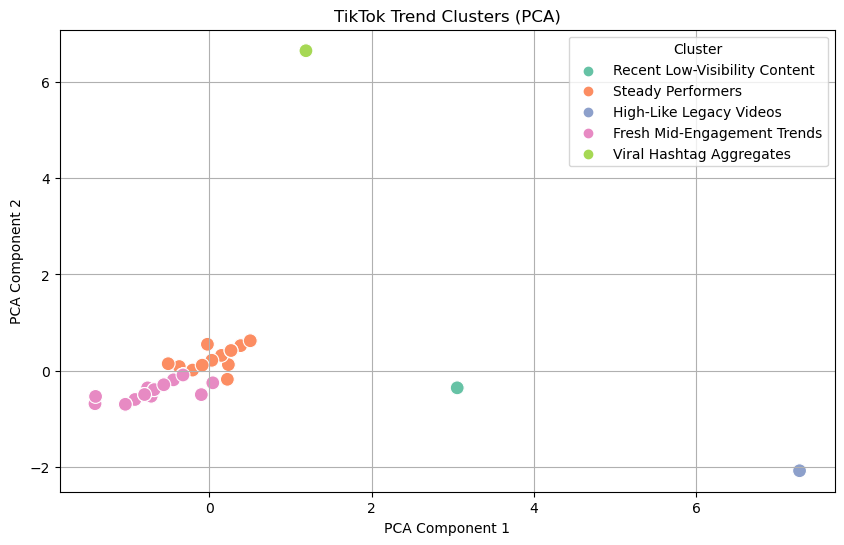

In [32]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

cluster_labels = {
    0: "Fresh Mid-Engagement Trends",
    1: "Recent Low-Visibility Content",
    2: "Viral Hashtag Aggregates",
    3: "High-Like Legacy Videos",
    4: "Steady Performers"
}

df['cluster_label'] = df['cluster'].map(cluster_labels)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster_label'], palette='Set2', s=100)
plt.title('TikTok Trend Clusters (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [33]:
cluster_summary = df.groupby('cluster')[['views', 'likes', 'hashtag_count', 'days_since_upload']].mean()
print(cluster_summary)

                views         likes  hashtag_count  days_since_upload
cluster                                                              
0        9.923958e+06  3.908462e+05            2.0           5.192308
1        1.905000e+07  3.850000e+05            3.0          14.000000
2        3.930000e+10  3.850000e+05            2.0          15.000000
3        2.940000e+07  3.400000e+06            3.0          15.000000
4        1.017320e+07  3.804500e+05            2.0          11.750000


In [34]:
features = ['views', 'likes', 'hashtag_count', 'days_since_upload']
X = df[features]
scaler.fit(X)


new_entry = {
    'views': 15_000_000,
    'likes': 500_000,
    'hashtag_count': 3,
    'days_since_upload': 7
}

new_df = pd.DataFrame([new_entry])
new_scaled = scaler.transform(new_df)
predicted_cluster = kmeans.predict(new_scaled)[0]
print(f"Predicted Cluster: {predicted_cluster}")

Predicted Cluster: 1
